## Importing Relevant Modules and Libraries

In [860]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap library
from  sklearn import linear_model
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

plt.style.use("seaborn-v0_8")

## DATA IMPORT AND INSPECTION:


In [863]:
df= pd.read_excel("C:\\Users\\DELL\\Downloads\\ECO R.xlsx")

In [865]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deny       2380 non-null   object 
 1   pirat      2380 non-null   float64
 2   hirat      2380 non-null   float64
 3   lvrat      2380 non-null   float64
 4   chist      2380 non-null   int64  
 5   mhist      2380 non-null   int64  
 6   phist      2380 non-null   object 
 7   unemp      2380 non-null   float64
 8   selfemp    2380 non-null   object 
 9   insurance  2380 non-null   object 
 10  condomin   2380 non-null   object 
 11  afam       2380 non-null   object 
 12  single     2380 non-null   object 
 13  hschool    2380 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 260.4+ KB


In [867]:
df.head()

,deny,pirat,hirat,lvrat,chist,mhist,phist,unemp,selfemp,insurance,condomin,afam,single,hschool
0,no,0.221,0.221,0.800000,5,2,no,3.9,no,no,no,no,no,yes
1,no,0.265,0.265,0.921875,2,2,no,3.2,no,no,no,no,yes,yes
2,no,0.372,0.248,0.920398,1,2,no,3.2,no,no,no,no,no,yes
3,no,0.320,0.250,0.860465,1,2,no,4.3,no,no,no,no,no,yes
4,no,0.360,0.350,0.600000,1,1,no,3.2,no,no,no,no,no,yes


In [869]:
df.describe()

,pirat,hirat,lvrat,chist,mhist,unemp
count,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000,2380.000000
mean,0.330814,0.255346,0.737776,2.116387,1.721008,3.774496
std,0.107257,0.096656,0.178751,1.666721,0.537282,2.027062
min,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000
25%,0.280000,0.214000,0.652681,1.000000,1.000000,3.100000
50%,0.330000,0.260000,0.779536,1.000000,2.000000,3.200000
75%,0.370000,0.298825,0.868459,2.000000,2.000000,3.900000
max,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000


## Data Preprocessing

In [872]:
# Adding a column MORTGAGE_Deny in data frame df.
# Value 0 stands for no and 1 stands for yes
# 1 means mortgage has been denied and 
# 0 means mortgage has been Accepted
df['MORTGAGE_deny'] = df['deny'].map({'no': 0, 'yes': 1})


## Data Visualization 

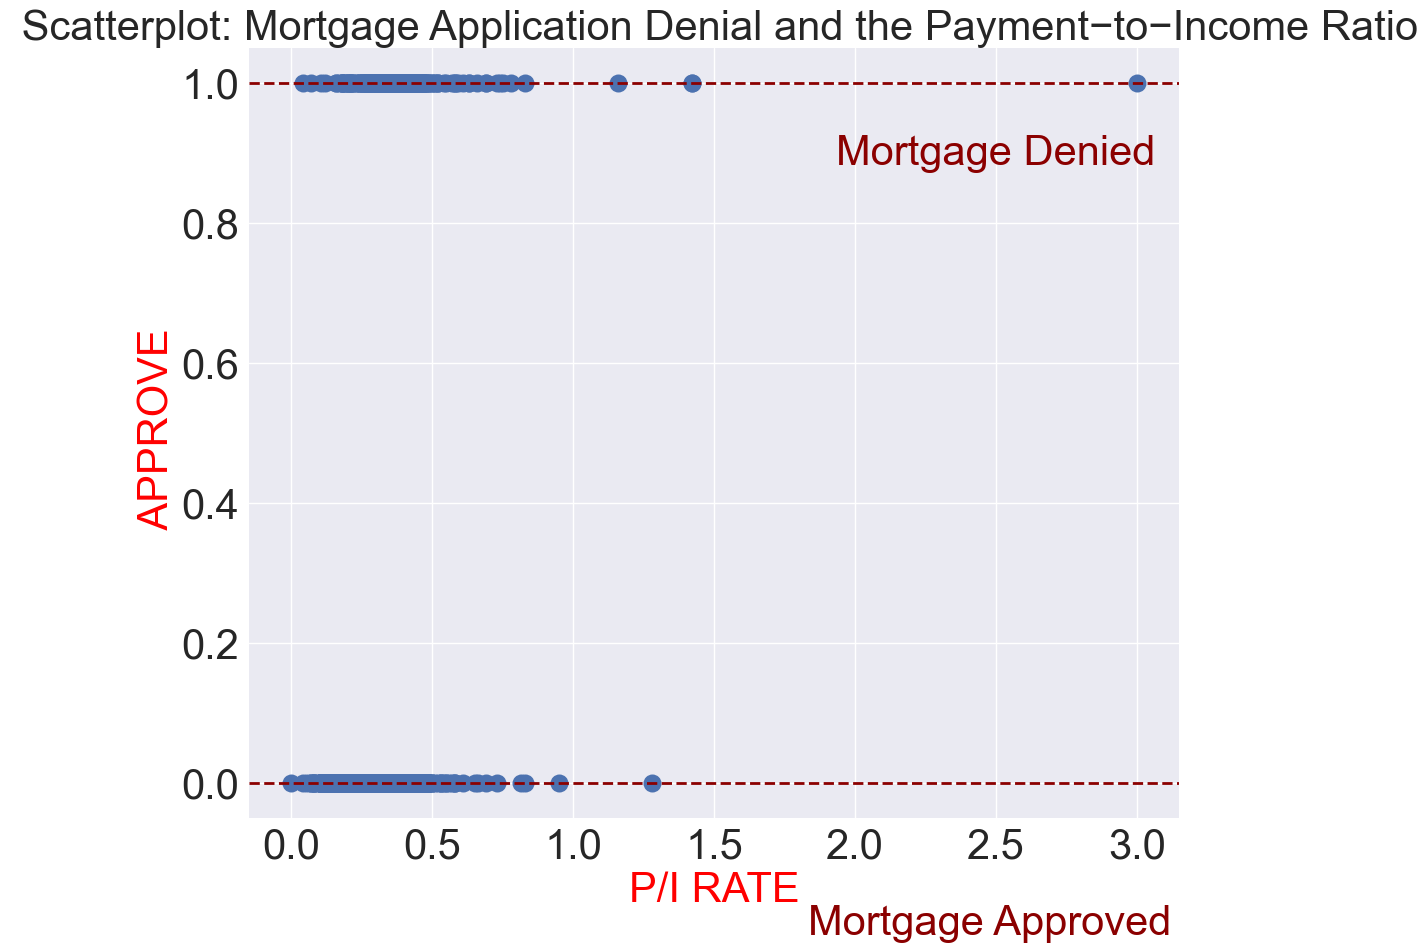

In [953]:
 
# Plot scatter plot with pirat on x axis and MORTGAGE_APPROVE ON y
df.plot(kind="scatter", figsize=(12, 10),x="pirat", 
        y="MORTGAGE_deny", fontsize=25,
        s=120, linewidths=2)
# Title, axis tick labels font size
plt.title(" Scatterplot: Mortgage Application Denial and the Payment−to−Income Ratio", fontsize = 30)
plt.ylabel(" APPROVE", fontsize = 30, color = "red")
plt.xlabel("P/I RATE" , fontsize = 30, color = "red")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
# Adding horizontal dashed lines
plt.axhline(y=1, color='darkred', linestyle='--', linewidth=2, label='Mortgage Denied')  
plt.axhline(y=0, color='darkred', linestyle='--', linewidth=2, label='Mortgage Approved')  
# Adding text labels with proper positioning and formatting
plt.text(2.5, -0.2, 'Mortgage Approved ', va='center', ha='center', fontsize=30, color='darkred')  # Vertical alignment, horizontal alignment
plt.text(2.5, 0.9, 'Mortgage Denied', va='center', ha='center', fontsize=30, color='darkred')
# Display the plot
plt.show()

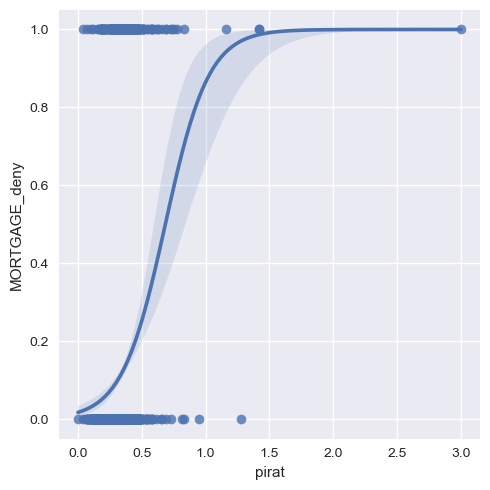

In [878]:
sns.lmplot(x="pirat", y="MORTGAGE_deny", data=df,
           logistic=True);

## Logistic Regression

In [881]:
# Standardizing features
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)  # Fitting the scaler on the training data

X_test = scaler.transform(X_test)

In [883]:
X = df.pirat
y = df.MORTGAGE_deny

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)
#type(X_train)
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1, 1) 
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1, 1)


In [885]:
# Trainning the Logistic Regression model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [887]:
# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))


Accuracy: 87.96%


In [991]:
coefficients = model.coef_
intercept = model.intercept_ 
x_lin =  np.linspace(0, 3, 100)
y_lin = intercept + coefficients*x_lin
y_predict =1/(1+ np.exp(-(y_lin)))



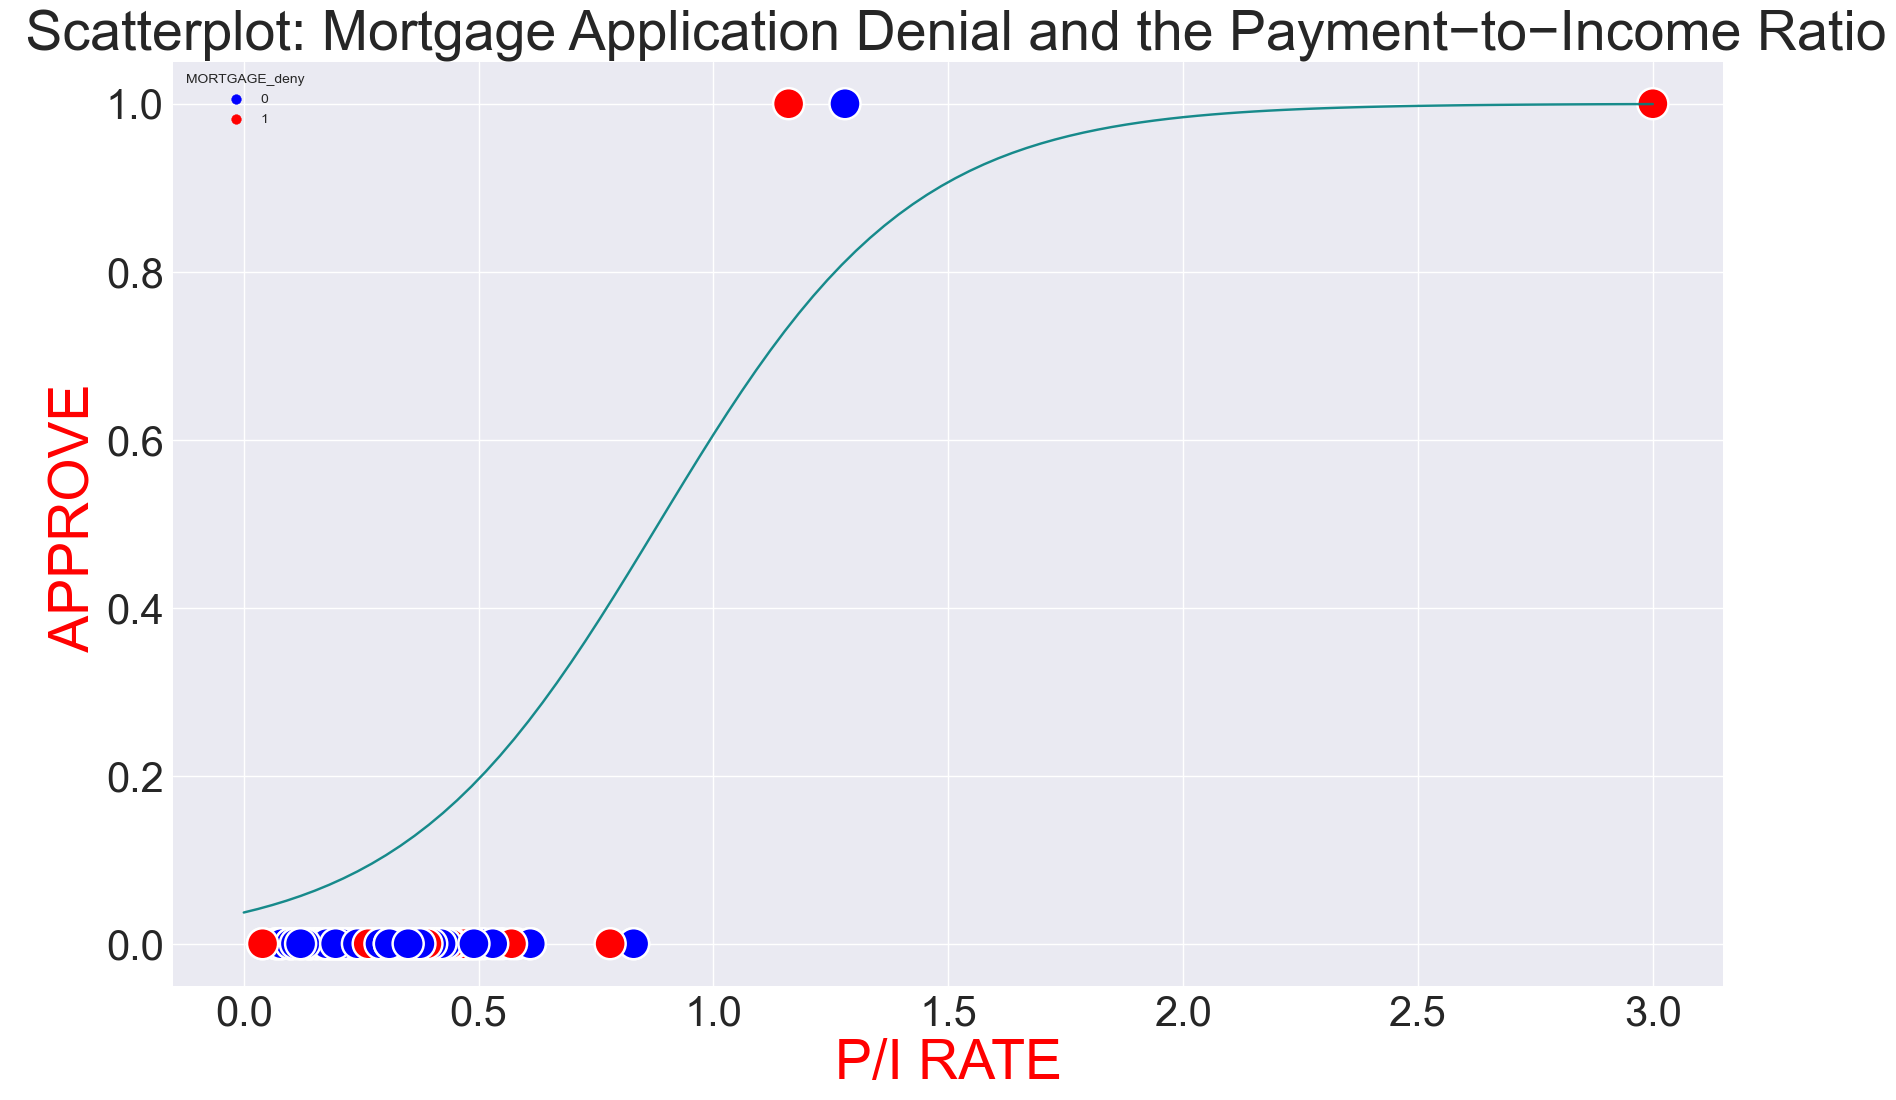

In [993]:
# Visualizing the decision boundary with accuracy information
plt.figure(figsize=(20, 12))
plt.plot(x_lin, y_predict.reshape(100,), color = "teal", alpha = 0.9)

sns.scatterplot(x=X_test[:,0], y=y_pred, hue=y_test, 
                palette={0: 'blue', 1: 'red'}, marker='o', s = 500)
plt.title(" Scatterplot: Mortgage Application Denial and the Payment−to−Income Ratio", fontsize = 40)
plt.ylabel(" APPROVE", fontsize = 40, color = "red")
plt.xlabel("P/I RATE" , fontsize = 40, color = "red")
plt.xticks(fontsize=30) 	
plt.yticks(fontsize=30) 
plt.show()


In [893]:
# evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[626   1]
 [ 85   2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       627
           1       0.67      0.02      0.04        87

    accuracy                           0.88       714
   macro avg       0.77      0.51      0.49       714
weighted avg       0.85      0.88      0.83       714



In [1001]:
cm = confusion_matrix(y_test, y_pred)

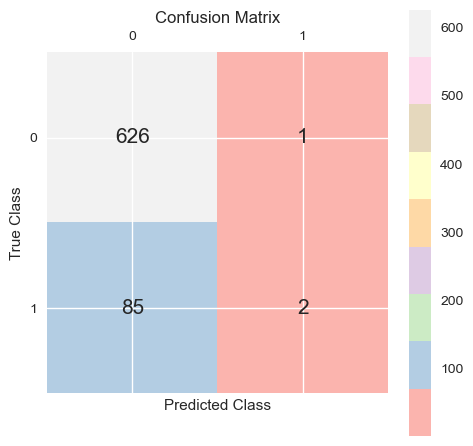

In [1007]:
# Assuming you have your confusion matrix as a NumPy array 'cm'

# Create a heatmap with default colormap
plt.matshow(cm, cmap='Pastel1')  # Adjust 'Blues' to a preferred colormap

# Add labels and title
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# Show colorbar (optional)
plt.colorbar()

# Annotate values in each cell (optional)
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=15)  # Adjust fontsize as needed

plt.show()